In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from itertools import combinations
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# convert list of lists to list
def flatten(lst):
    return [item for sublist in lst for item in sublist]

## DATA GATHERING

In [3]:
df = pd.read_csv('datasets/netflix_titles.csv')
print(f'Columns ({len(df.columns)}): {df.columns.values.tolist()}\n')
print(f'Shape: {df.shape}')
display(df.head())

Columns (12): ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Filter data
def filter_data(df, filter):
    df2 = df.loc[(df['type'] == filter)].reset_index(drop=True) # filter to defined type
    # print(f'Shape: {df2.shape}')
    # display(df2.head())
    return df2

## TEMPORAL VISUALIZATION

In [5]:
temporal_dataset = df.copy()
temporal_dataset['constant'] = 1
temporal_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,constant
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1


In [6]:
# drop na data, split based on commas, remove symbols, and flatten
temporal_dataset_clean = temporal_dataset.country.dropna()
temporal_dataset_country = flatten([x.split(', ') for x in temporal_dataset_clean])
temporal_dataset_country = [re.sub('[^A-Za-z ]+', '', x) for x in temporal_dataset_country]
temporal_dataset_year = flatten([[temporal_dataset.release_year[x] for n in range(len(y.split(', ')))] for x, y in enumerate(temporal_dataset_clean)])

# constant to use as counter
temporal_df = pd.DataFrame(data={'Country': temporal_dataset_country, 'Year': temporal_dataset_year, 'Constant': [1 for x in temporal_dataset_country]})
display(temporal_df.head())

# group data by country and year
temporal_df2 = temporal_df.groupby(['Country', 'Year']).sum()
temporal_df2 = temporal_df2[['Constant']].reset_index()
display(temporal_df2.head())

# show sorted data
display(temporal_df2.sort_values(by='Constant', ascending=False))

# transform data for visualization
temporal_dataset_country_count = pd.DataFrame(temporal_dataset_country).value_counts().index.tolist()
temporal_dataset_country_count = pd.DataFrame(data={'Country': temporal_dataset_country})
temporal_dataset_country_count2 = temporal_dataset_country_count.value_counts().keys().tolist()
temporal_dataset_country_count2 = [str(x).strip("('',)") for x in temporal_dataset_country_count2][0:10]
print(temporal_dataset_country_count2)

,Country,Year,Constant
0,United States,2020,1
1,South Africa,2021,1
2,India,2021,1
3,United States,2021,1
4,Ghana,2021,1


,Country,Year,Constant
0,,2020,1
1,,2021,1
2,Afghanistan,2016,1
3,Albania,2011,1
4,Algeria,2017,1


,Country,Year,Constant
1145,United States,2018,459
1144,United States,2017,449
1146,United States,2019,397
1143,United States,2016,379
1147,United States,2020,377
...,...,...,...
578,Lebanon,1997,1
579,Lebanon,1999,1
580,Lebanon,2008,1
582,Lebanon,2012,1


['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']


In [7]:
pal = list(sns.color_palette(palette='flare').as_hex())

fig = go.Figure()
for d, p in zip(temporal_dataset_country_count2, pal):
  fig.add_trace(
      go.Scatter(
          x = temporal_df2[temporal_df2['Country'] == d]['Year'],
          y = temporal_df2[temporal_df2['Country'] == d]['Constant'],
          name = d,
          line_color = p,
          fill = None,
      ) 
  )
  fig.update_layout(
    title='Temporal Visualization of Netflix Titles Based on Country',
    xaxis_title="Year",
    yaxis_title="Number of Netflix Titles",
    legend_title="Type",
)
fig.show()

## NETWORK VISUALIZATION

In [8]:
# Filter data
def filter_data(df, filter):
    df2 = df.loc[(df['type'] == filter)].reset_index(drop=True) # filter to defined type
    # print(f'Shape: {df2.shape}')
    # display(df2.head())
    return df2

In [9]:
# Nodes
def create_nodes(listed_in):
    genres_n = [x.split(", ") for x in listed_in] # split based on commas
    genres_flattened = [item for sublist in genres_n for item in sublist] # flatten list
    genres_nodes = list(set(genres_flattened)) # get the unique genres
    genres_nodes.sort() # sort the list
    top_genres = pd.DataFrame(genres_flattened).value_counts() # get the top 10 genres
    # print(f'Genres List ({len(genres_nodes)}):\n{genres_nodes[0:10]} .... \n')
    # print(f'Top 10 Genres:\n{top_genres[0:10]}')
    return genres_nodes

# Edges
def create_edges(listed_in):
    genres_edges = list()
    for x in listed_in:
        entry = x.split(", ") # split based on commas
        entry_combinations = [items for items in combinations(entry, r=2)] # get the combinations per entry
        [genres_edges.append(x) for x in entry_combinations] # append the genre combinations as edges
    # print(f'Genres Combinations ({len(list(set(genres_edges)))}): {genres_edges[0:5]} ....')
    return genres_edges

# Get number of actual connections
def get_actual_connections(genres_edges):
    a = [x[0].split(", ") for x in genres_edges]
    b = [x[1].split(", ") for x in genres_edges]
    a.extend(b)
    c = pd.DataFrame(np.array(a).flatten()).value_counts()
    # print(f'\nNumber of actual connections:\n{c}')
    return c

In [10]:
# Set hovertext
def set_hovertext(G, actual_connections):
    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(f'''Genre: {adjacencies[0]}
            <br>Number of Actual Connections: {actual_connections.get(adjacencies[0]) if actual_connections.get(adjacencies[0]) else str(len(adjacencies[1]))}\
            <br>Number of Unique Connections: {str(len(adjacencies[1]))}\
            <br>Connections: {[y if x%2==0 else f'<br> {y}' for x, y in enumerate(list(set(adjacencies[1])))]}''')
    return node_adjacencies, node_text

# Set edges
def set_edges(G):
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')
    return edge_trace

# Set nodes
def set_nodes(G, node_adjacencies, node_text):
    node_x = []
    node_y = []
    node_name = []
    for node, adjacency in zip(G.nodes(), G.adjacency()):
        x, y = G.nodes[node]['pos']
        node_x.append(x)
        node_y.append(y)
        node_name.append(adjacency[0])
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_name,
        textposition="top center",
        hovertext=node_text,
        marker=dict(
            showscale=True,
            colorscale='Blues',
            reversescale=True,
            color=[],
            size=35,
            colorbar=dict(
                thickness=15,
                title='Number of Unique Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))
    node_trace.marker.color = node_adjacencies
    return node_trace

In [11]:
# Create graph
def create_graph(genres_nodes, genres_edges, actual_connections):
    G = nx.waxman_graph(n=genres_nodes, beta=0.5, alpha=0.1, seed=69)
        # nx.thresholded_random_geometric_graph(n=genres_nodes, radius=0.125, theta=0.2, seed=69)
        # nx.random_geometric_graph(n=genres_nodes, radius=0.125, seed=69)
    G.add_nodes_from(genres_nodes)
    G.add_edges_from(genres_edges)

    node_adjacencies, node_text = set_hovertext(G, actual_connections)
    edge_trace = set_edges(G)
    node_trace = set_nodes(G, node_adjacencies, node_text)

    return G, edge_trace, node_trace

In [12]:
# Netflix Genres Network Visualization
filter = 'Movie'
dataframe_filter = filter_data(df, filter)
genres_nodes = create_nodes(dataframe_filter.listed_in)
genres_edges = create_edges(dataframe_filter.listed_in)
actual_connections = get_actual_connections(genres_edges)
G, edge_trace, node_trace = create_graph(genres_nodes, genres_edges, actual_connections)

fig = go.Figure(data=[edge_trace, node_trace],
    layout=go.Layout(
        title=f'<br>Netflix {filter} Genres Network Visualization',
        title_font_size=18, width=1200, height=600,
        showlegend=False, hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=80),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
    )
fig.show()

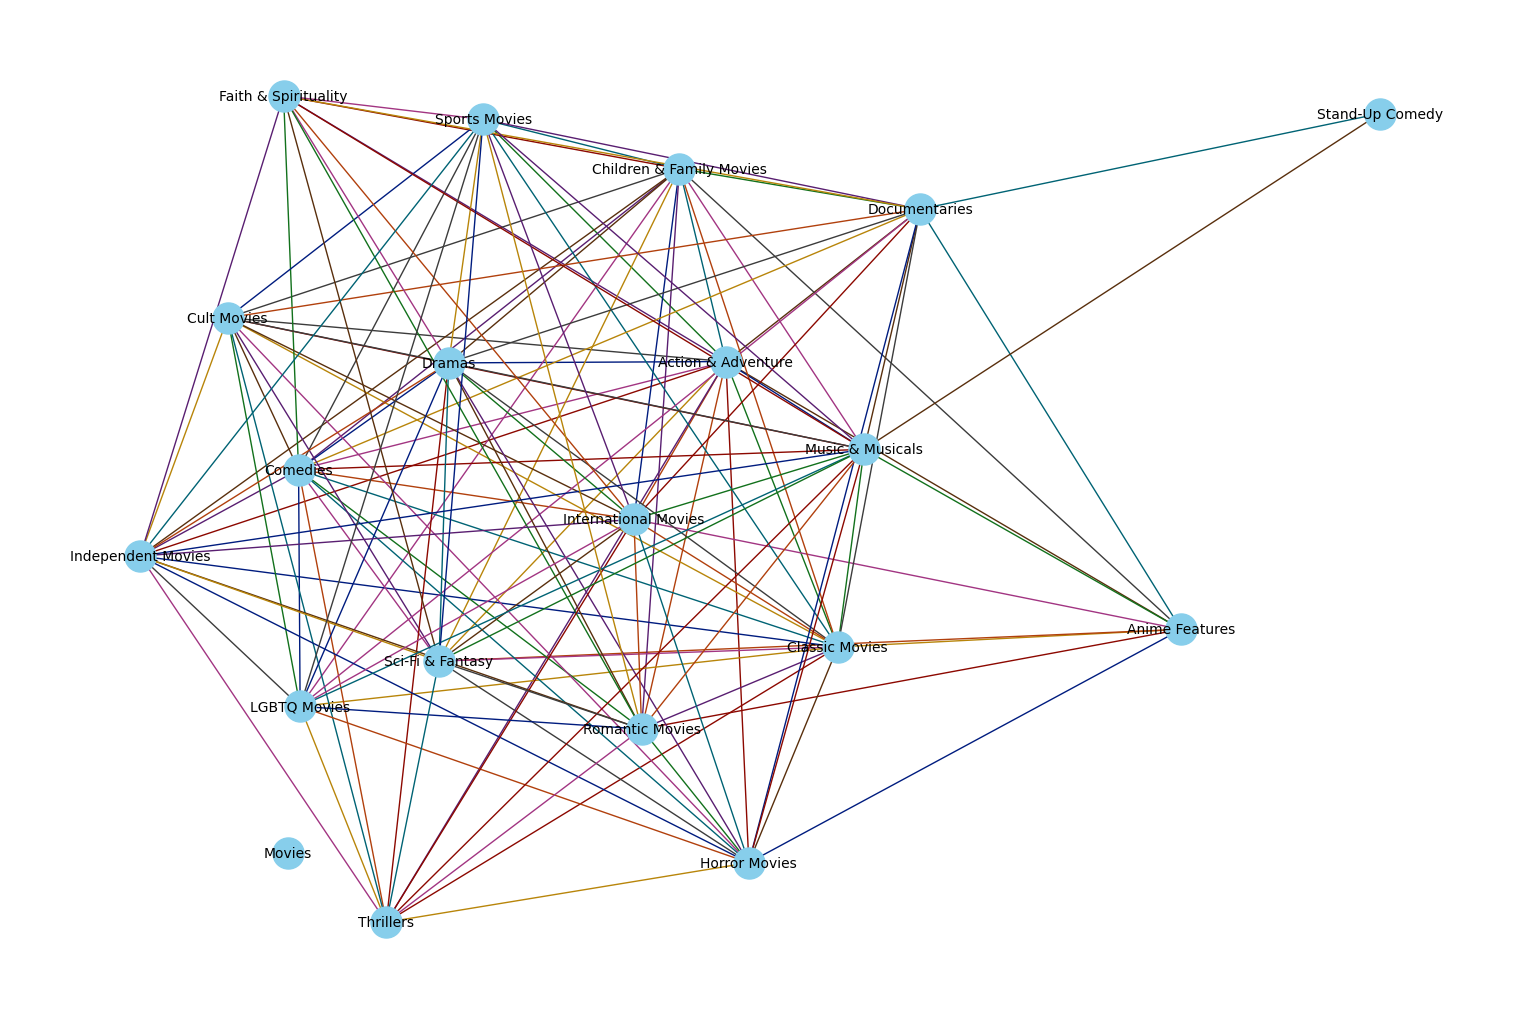

In [13]:
# Kamada Kawai layout
G2 = nx.Graph()
G2.add_nodes_from(genres_nodes)
G2.add_edges_from(genres_edges)

# Set color
genres_nodes_from = [x[0] for x in genres_edges]
genres_nodes_from = LabelEncoder().fit_transform(genres_nodes_from)
colors = list(sns.color_palette(palette='dark', n_colors=len(genres_nodes_from)).as_hex())
colors[0:5]

plt.figure(1, figsize=(15, 10)) 
nx.draw(G2, pos=nx.kamada_kawai_layout(G, scale=1, weight='width', dim=2), with_labels=True, 
    node_size=500, font_size=10, node_color='skyblue', width=1.0,
    edge_color=colors, edge_cmap=plt.cm.Blues) # '#00b4d9')
plt.show()


In [14]:
# Get first 3 entries in 'cast' column (Movie)
# Remove na and symbols
dataframe_cast_filtered = df[df['cast'].notna()]
dataframe_cast_filtered['cast'] = dataframe_cast_filtered['cast'].str.replace('$', '', regex=True)
dataframe_cast_filtered.head()
# dataframe_filter = filter_data(dataframe_cast_filtered, 'Movie')
genres_nodes = create_nodes(pd.Series(dataframe_cast_filtered.at[5940, 'cast']))
genres_edges = create_edges(pd.Series(dataframe_cast_filtered.at[5940, 'cast']))

In [15]:
# Netflix Genres Network Visualization (Movie; Waxman Graph)
actual_connections = get_actual_connections(genres_edges)
G, edge_trace, node_trace = create_graph(genres_nodes, genres_edges, actual_connections)

fig = go.Figure(data=[edge_trace, node_trace],
    layout=go.Layout(
        title=f'<br>Netflix Movie Cast Network Visualization',
        title_font_size=18, width=1150, height=600,
        showlegend=False, hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=80),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
    )
fig.show()

## REFERENCES:

https://www.kaggle.com/datasets/shivamb/netflix-shows?fbclid=IwAR0ckNrE2XlIc5OWzKjQZP85s96dojVKDHzK4dgOJfFTMe3Velsk3FwZsR0

https://plotly.com/python/network-graphs/?fbclid=IwAR3JPFZv1UcDrbFMX6wKwOyE5oddl3Ah6pqowQbbEhvNUno1S-X5FbfAdaU